In [ ]:
import sys
sys.path.append("utils")
import dynamic_backtesting as db
import compare_strategies as cs
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
plt.style.use('seaborn')
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=["grey", "green", "black", "deepskyblue", "orange", "lime", "purple", "Gold", "brown", "blue", "pink"]) 

In [ ]:
assets = {"EEM": "Emerging Markets",
           "IVV": "S&P 500",
           "IEV": "MSCI Europe",
           "IXN": "Global Tech",
           "IYR": "US Real Estate",
           "IXG": "Global Financials",
           "EXI": "Global Industrials",
           "GC=F": "Gold Futures", 
           "BZ=F": "Brent Crude Oil Futures",
           "HYG": "High-Yield Corporate Bonds",
           "TLT": "20+ Year Treasury Bonds"}
tickers = list(assets.keys())
stocks = tickers[:7]
commodities = tickers[7:9]
bonds = tickers[9:]

**Finder vægter for de tre typer UGARCH modeller**

In [ ]:
v_t_ARCH, out_of_sample_s_ARCH, in_sample_s_ARCH, Omega_t_ARCH = db.garch_no_trading_cost(tickers, number_of_out_of_sample_days=4*250, model_type="sGARCH10")
v_t_GARCH, out_of_sample_s_GARCH, in_sample_s_GARCH,Omega_t_GARCH = db.garch_no_trading_cost(tickers, number_of_out_of_sample_days=4*250, model_type="sGARCH11")
v_t_GJR, out_of_sample_s_GJR, in_sample_s_GJR, Omega_t_GJR = db.garch_no_trading_cost(tickers, number_of_out_of_sample_days=4*250, model_type="gjrGARCH11")

**Udregner performance**

In [ ]:
res_ARCH, perf_table_ARCH = cs.performance_table(v_t_ARCH, out_of_sample_s_ARCH,Omega_t_ARCH)
res_GARCH, perf_table_GARCH = cs.performance_table(v_t_GARCH, out_of_sample_s_GARCH,Omega_t_GARCH)
res_GJR, perf_table_GJR = cs.performance_table(v_t_GJR, out_of_sample_s_GJR,Omega_t_GJR)

**Sammensætter til en tabel**

In [ ]:
#No trading cost first
perf_table=perf_table_ARCH.iloc[0:1,]
perf_table=perf_table.rename(index={'GARCH':'ARCH(1)'})
perf_table=perf_table.append(perf_table_GARCH.iloc[0,])
perf_table=perf_table.rename(index={'GARCH':'GARCH(1,1)'})
perf_table=perf_table.append(perf_table_GJR.iloc[0,])
perf_table=perf_table.rename(index={'GARCH':'GJR-GARCH(1,1)'})
perf_table=perf_table.append(perf_table_GJR.iloc[2,])
perf_table=perf_table.append(perf_table_GJR.iloc[4,])
perf_table=perf_table.rename(index={'BnH':'Buy and hold','Equal_weight':'Equal weight'})
#Trading cost
perf_table=perf_table.append(perf_table_ARCH.iloc[1,])
perf_table=perf_table.rename(index={'GARCH TC':'ARCH(1) TC'})
perf_table=perf_table.append(perf_table_GARCH.iloc[1,])
perf_table=perf_table.rename(index={'GARCH TC':'GARCH(1,1) TC'})
perf_table=perf_table.append(perf_table_GJR.iloc[1,])
perf_table=perf_table.rename(index={'GARCH TC':'GJR-GARCH(1,1) TC'})
perf_table=perf_table.append(perf_table_GJR.iloc[3,])
perf_table=perf_table.append(perf_table_GJR.iloc[5,])
perf_table=perf_table.rename(index={'BnH TC':'Buy and hold TC','Equal_weight TC':'Equal weight TC'})
print(perf_table.to_latex())


**Laver en tabel af afkast**

In [30]:
res=res_ARCH.drop(columns=['GARCH TC','Equal_weight', 'BnH','Equal_weight TC','BnH TC']).rename(columns={'GARCH':'ARCH(1)'})
res["GARCH(1,1)"]=res_GARCH["GARCH"]
res["GJR-GARCH(1,1)"]=res_GJR["GARCH"]
res["Equal weight"]=res_GJR["Equal_weight"]
res["Buy and hold"]=res_GJR["BnH"]

res_TC=res_ARCH.drop(columns=['GARCH','Equal_weight', 'BnH','Equal_weight TC','BnH TC']).rename(columns={'GARCH TC':'ARCH(1)'})
res_TC["GARCH(1,1)"]=res_GARCH["GARCH TC"]
res_TC["GJR-GARCH(1,1)"]=res_GJR["GARCH TC"]
res_TC["Equal weight"]=res_GJR["Equal_weight TC"]
res_TC["Buy and hold"]=res_GJR["BnH TC"]

**Laver figurer**

Text(0, 1, 'Gross Return')

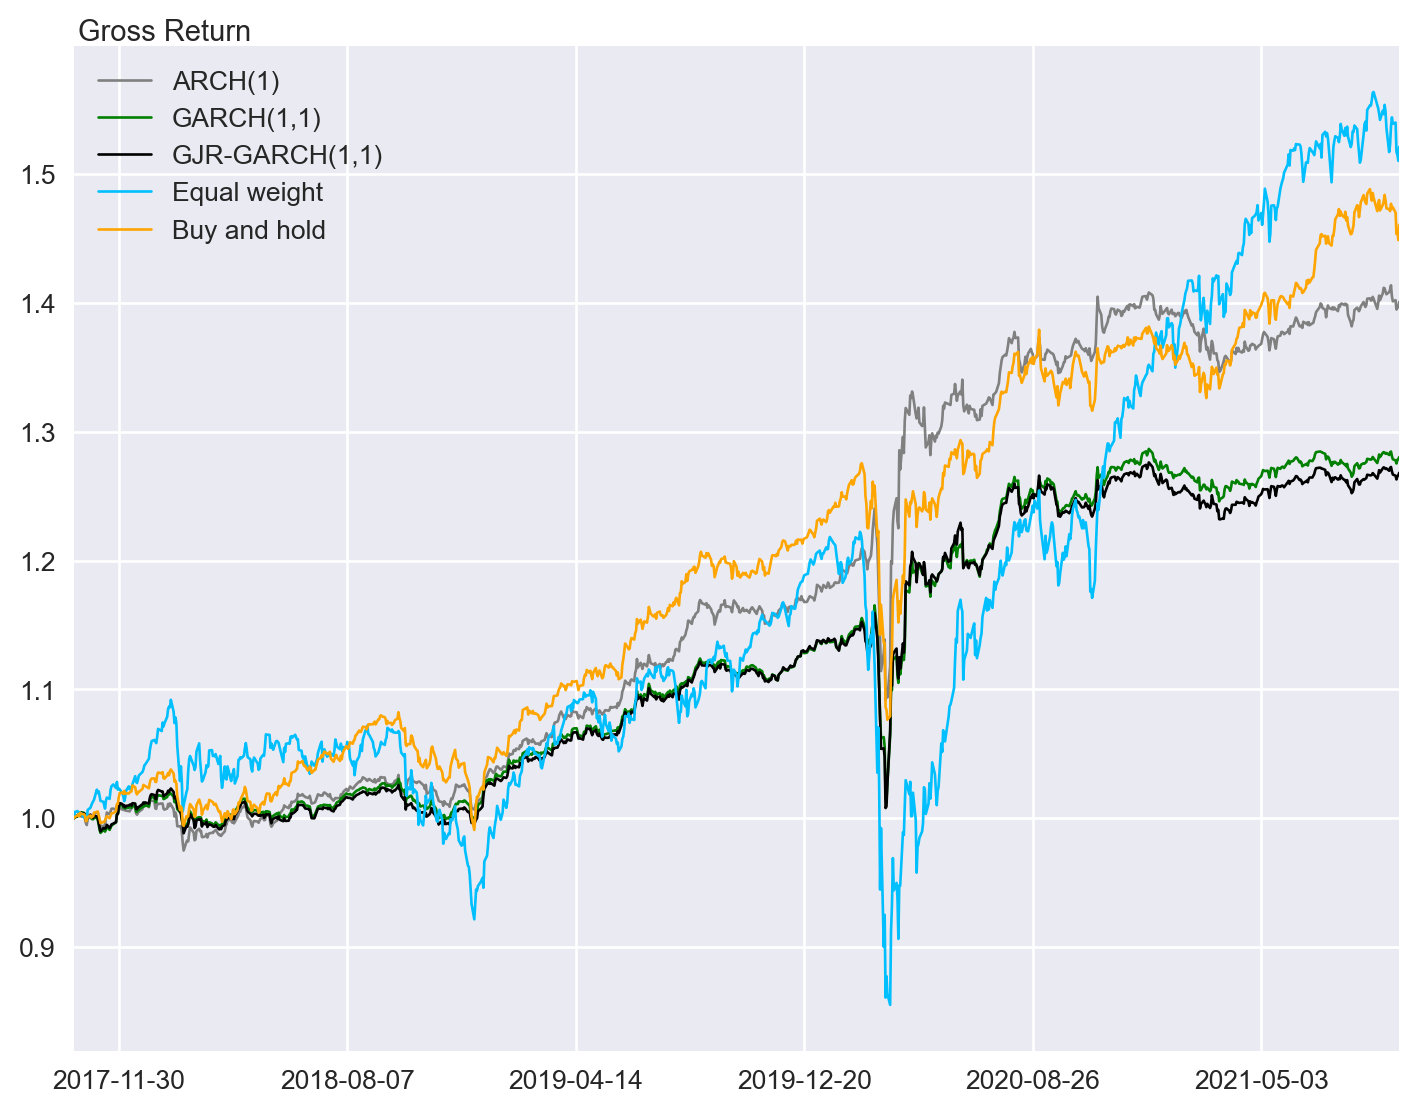

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(res,label=res.columns,linewidth=1)
ax.margins(0,0.05)
ax.legend(res.columns)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Gross Return',loc='top', rotation = 0, labelpad = -88) 
#fig.savefig("Backtesting\output\Performance_no_TC_before.png", bbox_inches = 'tight', pad_inches = 0.1)
#fig.savefig("Performance_no_TC_before.png", bbox_inches = 'tight', pad_inches = 0.1)


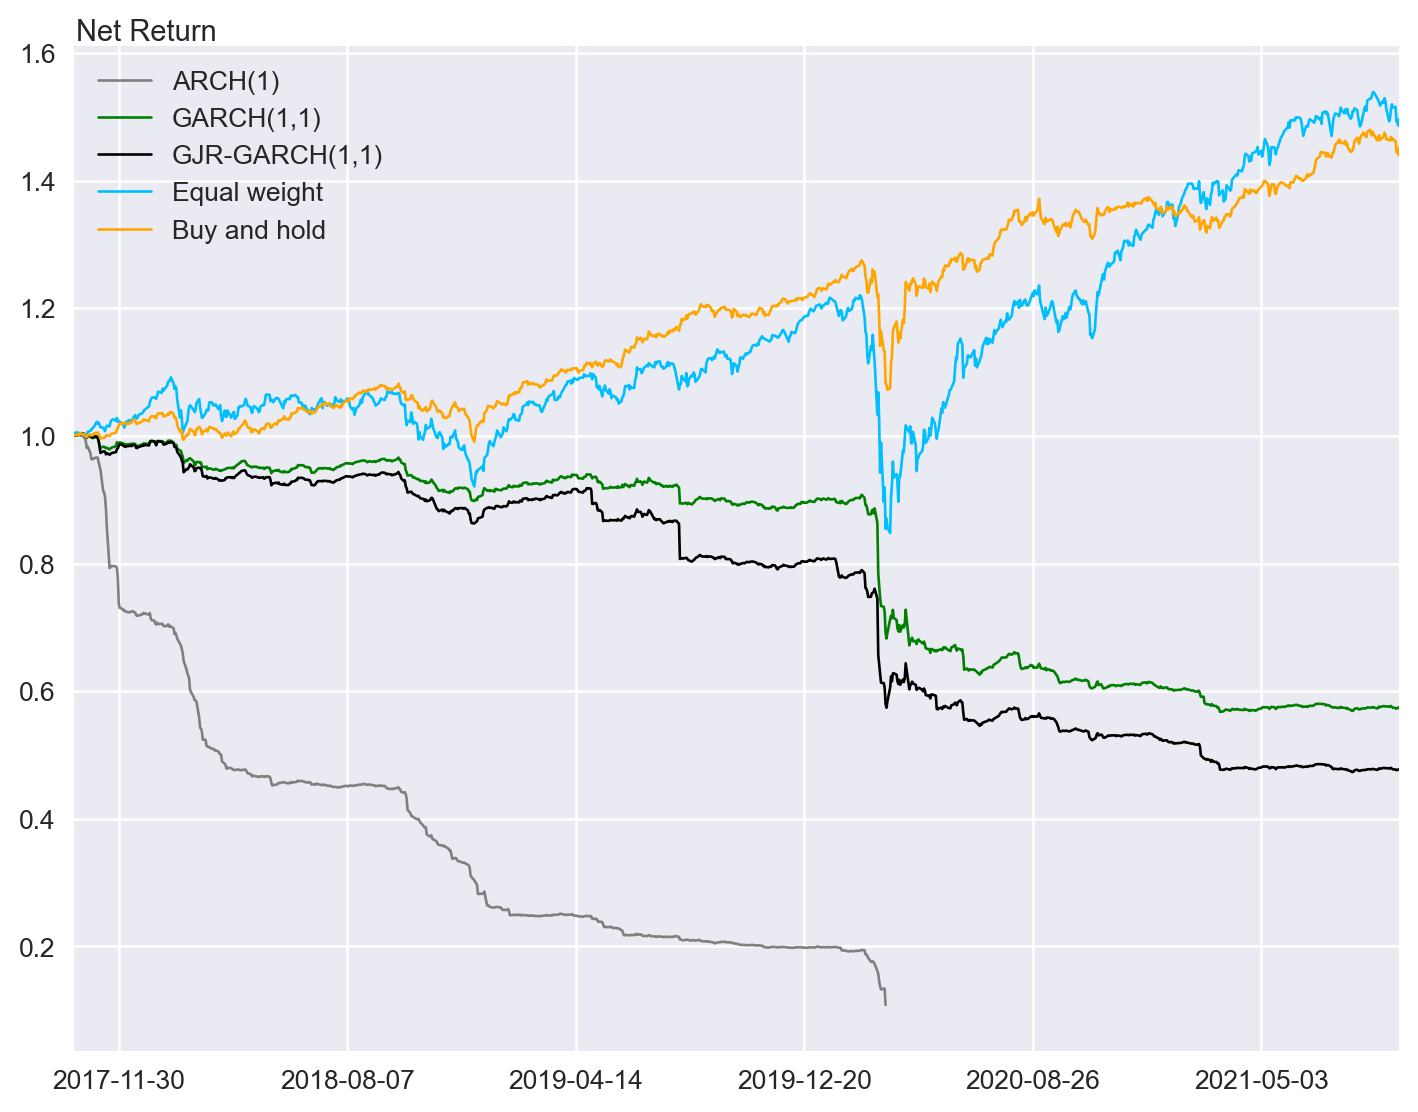

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(res_TC,label=res_TC.columns,linewidth=1)
ax.margins(0,0.05)
ax.legend(res_TC.columns)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Net Return',loc='top', rotation = 0, labelpad = -75) 
#fig.savefig("Backtesting\output\Performance_no_TC_after.png", bbox_inches = 'tight', pad_inches = 0.1)
fig.savefig("Performance_no_TC_after.png", bbox_inches = 'tight', pad_inches = 0.1)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_ARCH,linewidth=1)
ax.set_ylim(-0.35,1.3)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -78) 
#fig.savefig("Backtesting\output\ARCH_weight_NO_TC.png", bbox_inches = 'tight', pad_inches = 0.1)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_GARCH,linewidth=1)
ax.set_ylim(-0.35,1.3)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -78) 
#fig.savefig("Backtesting\output\GARCH_weight_NO_TC.png", bbox_inches = 'tight', pad_inches = 0.1)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_GJR,linewidth=1)
ax.set_ylim(-0.35,1.3)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -78) 
#fig.savefig("Backtesting\output\GJRGARCH_weight_NO_TC.png", bbox_inches = 'tight', pad_inches = 0.1)

**Lets consider a subset of the ticker, Stocks**

In [ ]:
v_t_ARCH_s, out_of_sample_s_ARCH_s, in_sample_s_ARCH_s, Omega_t_ARCH_s = db.garch_no_trading_cost(stocks, number_of_out_of_sample_days=4*250, model_type="sGARCH10")
v_t_GARCH_s, out_of_sample_s_GARCH_s, in_sample_s_GARCH_s,Omega_t_GARCH_s = db.garch_no_trading_cost(stocks, number_of_out_of_sample_days=4*250, model_type="sGARCH11")
v_t_GJR_s, out_of_sample_s_GJR_s, in_sample_s_GJR_s, Omega_t_GJR_s = db.garch_no_trading_cost(stocks, number_of_out_of_sample_days=4*250, model_type="gjrGARCH11")

In [ ]:
res_ARCH_s, perf_table_ARCH_s = cs.performance_table(v_t_ARCH_s, out_of_sample_s_ARCH_s,Omega_t_ARCH_s)
res_GARCH_s, perf_table_GARCH_s = cs.performance_table(v_t_GARCH_s, out_of_sample_s_GARCH_s,Omega_t_GARCH_s)
res_GJR_s, perf_table_GJR_s = cs.performance_table(v_t_GJR_s, out_of_sample_s_GJR_s,Omega_t_GJR_s)

In [32]:
#No trading cost first
perf_table_s=perf_table_ARCH_s.iloc[0:1,]
perf_table_s=perf_table_s.rename(index={'GARCH':'ARCH(1)'})
perf_table_s=perf_table_s.append(perf_table_GARCH_s.iloc[0,])
perf_table_s=perf_table_s.rename(index={'GARCH':'GARCH(1,1)'})
perf_table_s=perf_table_s.append(perf_table_GJR_s.iloc[0,])
perf_table_s=perf_table_s.rename(index={'GARCH':'GJR-GARCH(1,1)'})
perf_table_s=perf_table_s.append(perf_table_GJR_s.iloc[2,])
perf_table_s=perf_table_s.append(perf_table_GJR_s.iloc[4,])
perf_table_s=perf_table_s.rename(index={'BnH':'Buy and hold','Equal_weight':'Equal weight'})
#Trading cost
perf_table_s=perf_table_s.append(perf_table_ARCH_s.iloc[1,])
perf_table_s=perf_table_s.rename(index={'GARCH TC':'ARCH(1) TC'})
perf_table_s=perf_table_s.append(perf_table_GARCH_s.iloc[1,])
perf_table_s=perf_table_s.rename(index={'GARCH TC':'GARCH(1,1) TC'})
perf_table_s=perf_table_s.append(perf_table_GJR_s.iloc[1,])
perf_table_s=perf_table_s.rename(index={'GARCH TC':'GJR-GARCH(1,1) TC'})
perf_table_s=perf_table_s.append(perf_table_GJR_s.iloc[3,])
perf_table_s=perf_table_s.append(perf_table_GJR_s.iloc[5,])
perf_table_s=perf_table_s.rename(index={'BnH TC':'Buy and hold TC','Equal_weight TC':'Equal weight TC'})
print(perf_table_s.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  Ann. standard deviation &  Ann. return &  Ann. Sharpe ratio \\
\midrule
ARCH(1)           &                 0.216917 &     0.232639 &           1.072478 \\
GARCH(1,1)        &                 0.177720 &     0.102811 &           0.578499 \\
GJR-GARCH(1,1)    &                 0.183569 &     0.105042 &           0.572220 \\
Equal weight      &                 0.208240 &     0.127992 &           0.614637 \\
Buy and hold      &                 0.198297 &     0.163906 &           0.826567 \\
ARCH(1) TC        &                 0.822941 &    -1.632081 &          -1.983230 \\
GARCH(1,1) TC     &                 0.102464 &    -0.177503 &          -1.732337 \\
GJR-GARCH(1,1) TC &                 0.115222 &    -0.190154 &          -1.650335 \\
Equal weight TC   &                 0.208147 &     0.121425 &           0.583361 \\
Buy and hold TC   &                 0.196346 &     0.112489 &           0.572911 \\
\bottomrule
\end{tabular}



In [33]:
res_s=res_ARCH_s.drop(columns=['GARCH TC','Equal_weight', 'BnH','Equal_weight TC','BnH TC']).rename(columns={'GARCH':'ARCH(1)'})
res_s["GARCH(1,1)"]=res_GARCH_s["GARCH"]
res_s["GJR-GARCH(1,1)"]=res_GJR_s["GARCH"]
res_s["Equal weight"]=res_GJR_s["Equal_weight"]
res_s["Buy and hold"]=res_GJR_s["BnH"]

res_TC_s=res_ARCH_s.drop(columns=['GARCH','Equal_weight', 'BnH','Equal_weight TC','BnH TC']).rename(columns={'GARCH TC':'ARCH(1)'})
res_TC_s["GARCH(1,1)"]=res_GARCH_s["GARCH TC"]
res_TC_s["GJR-GARCH(1,1)"]=res_GJR_s["GARCH TC"]
res_TC_s["Equal weight"]=res_GJR_s["Equal_weight TC"]
res_TC_s["Buy and hold"]=res_GJR_s["BnH TC"]

Text(0, 1, 'Gross Return')

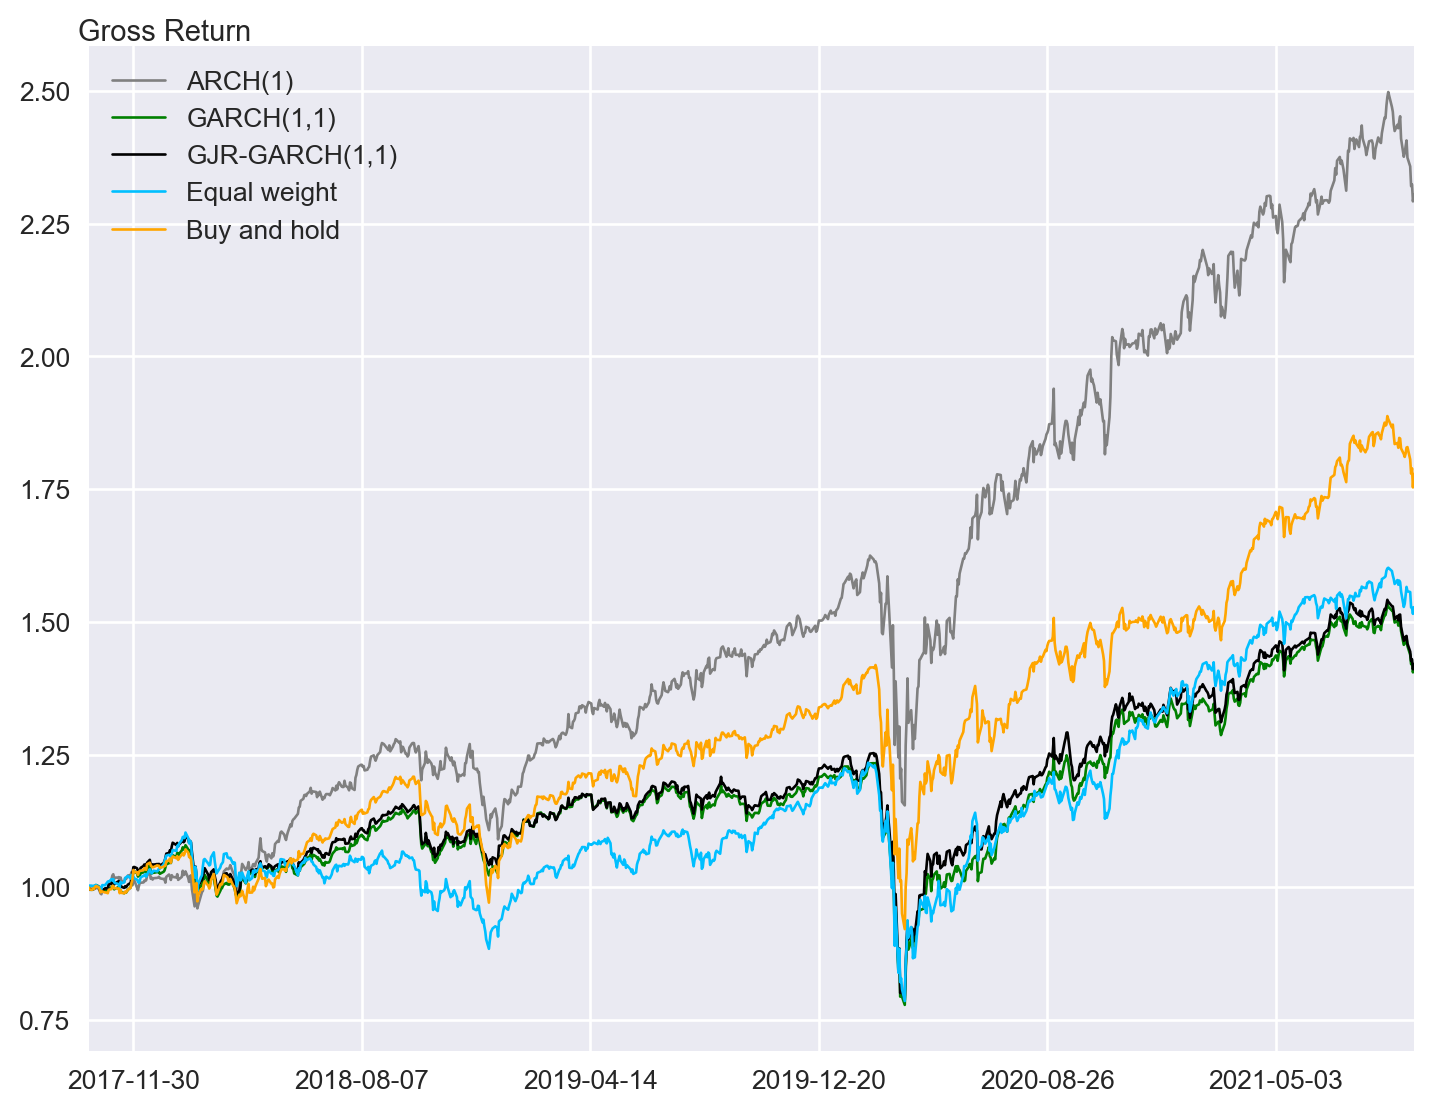

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(res_s,label=res_s.columns,linewidth=1)
ax.margins(0,0.05)
ax.legend(res_s.columns)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Gross Return',loc='top', rotation = 0, labelpad = -88) 
#fig.savefig("Backtesting\output\Performance_no_TC.png", bbox_inches = 'tight', pad_inches = 0.1)
#fig.savefig("Performance_no_TC_before_S.png", bbox_inches = 'tight', pad_inches = 0.1)

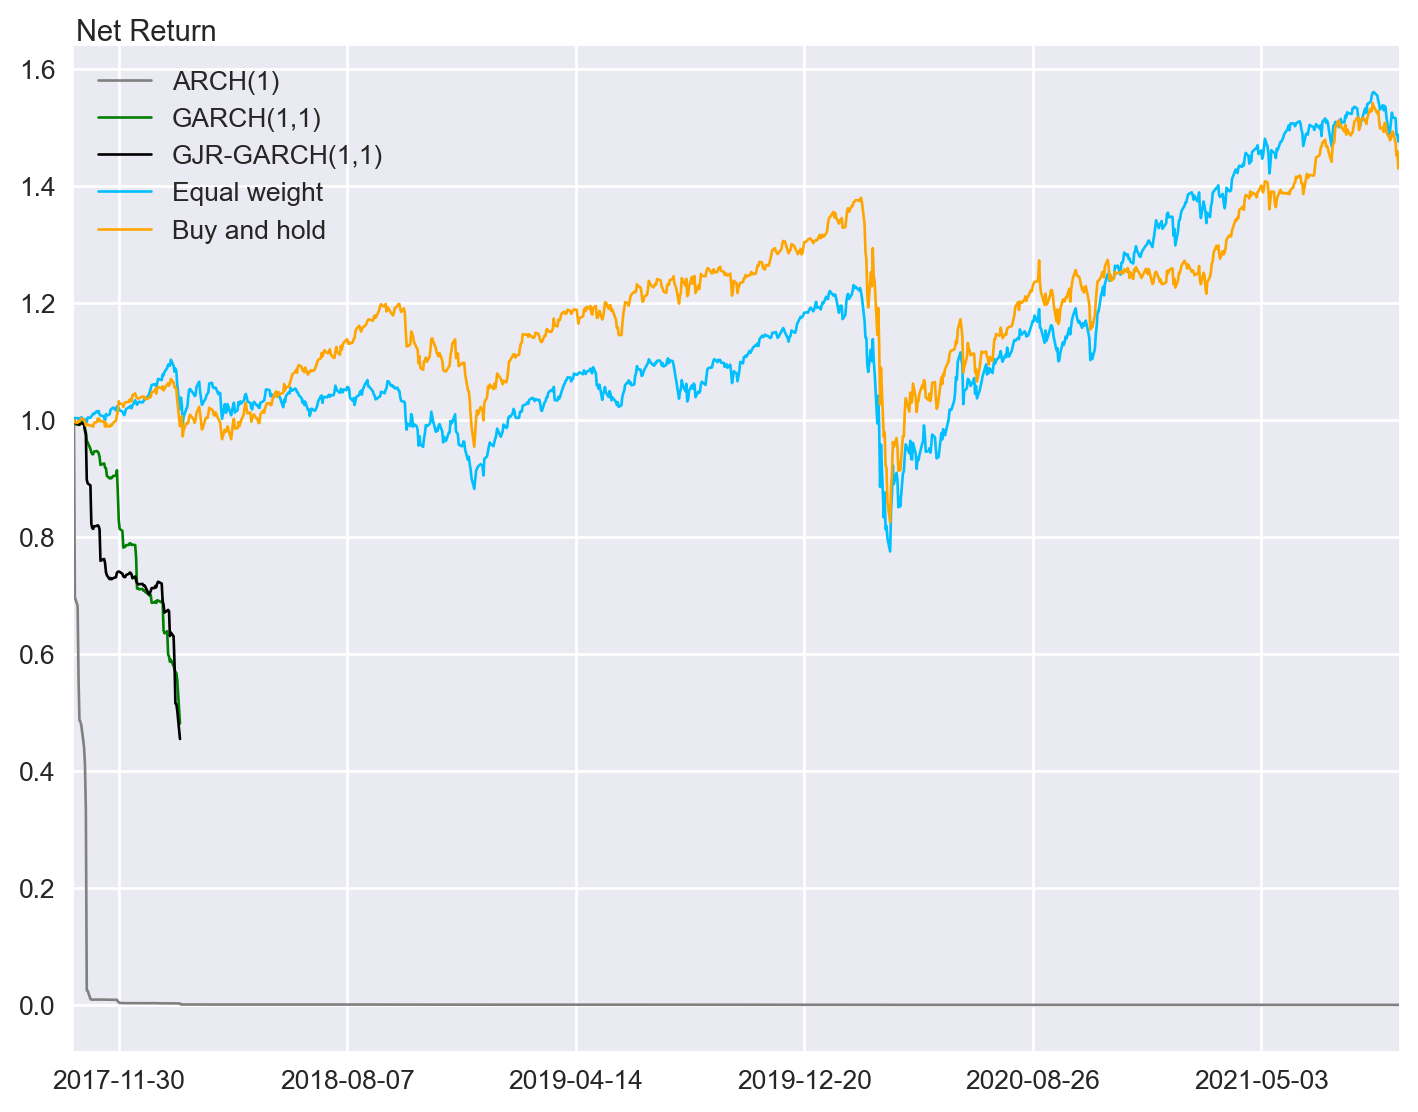

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(res_TC_s,label=res_TC_s.columns,linewidth=1)
ax.margins(0,0.05)
ax.legend(res_TC_s.columns)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Net Return',loc='top', rotation = 0, labelpad = -75) 
#fig.savefig("Backtesting\output\Performance_no_TC.png", bbox_inches = 'tight', pad_inches = 0.1)
fig.savefig("Performance_no_TC_after_S.png", bbox_inches = 'tight', pad_inches = 0.1)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_ARCH_s,linewidth=1)
ax.set_ylim(-1.5,2.6)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -78) 
#fig.savefig("Backtesting\output\ARCH_weight_NO_TC_S.png", bbox_inches = 'tight', pad_inches = 0.1)
fig.savefig("ARCH_weight_NO_TC_S.png", bbox_inches = 'tight', pad_inches = 0.1)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_GARCH_s,linewidth=1)
ax.set_ylim(-1.5,2.6)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -78) 
#fig.savefig("Backtesting\output\GARCH_weight_NO_TC_S.png", bbox_inches = 'tight', pad_inches = 0.1)
fig.savefig("GARCH_weight_NO_TC_S.png", bbox_inches = 'tight', pad_inches = 0.1)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_GJR_s,linewidth=1)
ax.set_ylim(-1.5,2.6)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -78) 
#fig.savefig("Backtesting\output\GJRGARCH_weight_NO_TC_S.png", bbox_inches = 'tight', pad_inches = 0.1)
fig.savefig("GJRGARCH_weight_NO_TC_S.png", bbox_inches = 'tight', pad_inches = 0.1)

In [46]:
res_ARCH_s.iloc[7:]

,GARCH,GARCH TC,Equal_weight,Equal_weight TC,BnH,BnH TC
Date,,,,,,
2017-10-23,0.997598,0.441424,0.999956,0.999946,0.997520,0.997385
2017-10-24,0.993573,0.411999,1.001240,1.001229,0.992697,0.992555
2017-10-25,0.988434,0.335180,0.998277,0.998263,0.987347,0.987151
2017-10-26,0.986892,0.024807,0.996666,0.996652,0.987762,0.987563
2017-10-27,0.995540,0.024182,1.004172,1.004156,0.991692,0.991489
...,...,...,...,...,...,...
2021-09-27,2.358084,0.000065,1.556186,1.513494,1.918459,1.632360
2021-09-28,2.320816,0.000064,1.527376,1.485431,1.886073,1.603902
2021-09-29,2.324016,0.000064,1.526398,1.484351,1.896706,1.612905


In [49]:
v_t_ARCH_s.iloc[7:]

,EEM,IVV,IEV,IXN,IYR,IXG,EXI
Date,,,,,,,
2017-10-23,-0.289657,0.410104,0.199759,0.338999,0.580872,-0.679325,0.439248
2017-10-24,-0.353479,0.375368,0.213414,0.411961,0.498285,-0.663764,0.518215
2017-10-25,-0.305886,0.759219,0.131023,0.188278,0.378485,-0.724314,0.573195
2017-10-26,-0.304298,0.007859,0.200054,0.502404,0.593092,-0.585822,0.586712
2017-10-27,-0.392663,0.787288,0.036289,0.268398,0.291039,-0.596718,0.606368
...,...,...,...,...,...,...,...
2021-09-27,-0.082143,0.200367,-0.499558,0.544146,0.019429,-0.017532,0.835290
2021-09-28,0.092796,0.843133,0.077067,-0.305348,-0.045193,-0.635563,0.973109
2021-09-29,0.416617,-0.508424,-0.219118,0.093633,0.844692,-0.145794,0.518395
